In [12]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
data_energia = pd.read_csv('energyco2.csv')

In [14]:
data_energia = data_energia[data_energia['Country'] == 'World']

In [15]:
fuentes = list(data_energia['Energy_type'].unique())

In [16]:
fuentes

['all_energy_types',
 'coal',
 'natural_gas',
 'petroleum_n_other_liquids',
 'nuclear',
 'renewables_n_other']

In [17]:
fuentes[4:6]

['nuclear', 'renewables_n_other']

In [18]:
data_energia_renovable = data_energia[data_energia['Energy_type'].isin(fuentes[4:6])].iloc[:,[1,3,5]]

In [19]:
data_energia_renovable

,Country,Year,Energy_production
4,World,1980,7.575700
5,World,1980,20.775178
1390,World,1981,8.527153
1391,World,1981,21.287405
2776,World,1982,9.507686
...,...,...,...
51287,World,2017,64.670935
52672,World,2018,26.513244
52673,World,2018,68.417714
54058,World,2019,27.659891


In [20]:
data_energia_renovable = data_energia_renovable.groupby('Year').sum()

In [21]:
data_energia_renovable

,Energy_production
Year,
1980,28.350879
1981,29.814558
1982,31.463309
1983,33.975146
1984,36.939166
1985,39.525187
1986,40.830969
1987,42.239018
1988,44.590140


In [22]:
data_energia_renovable.reset_index(inplace= True)

In [23]:
import matplotlib.pyplot as plt

In [24]:
x = data_energia_renovable['Year']
y = data_energia_renovable['Energy_production']

In [25]:
def tema():
    ax=plt.axes()
    plt.grid(color='#ffffff50', linewidth=0.9)
    ax.set_facecolor('#000000aa'),
    ax.spines['right'].set_visible(False),
    ax.spines['top'].set_visible(False),
    ax.spines['bottom'].set_visible(False),
    ax.spines['left'].set_visible(False),
    

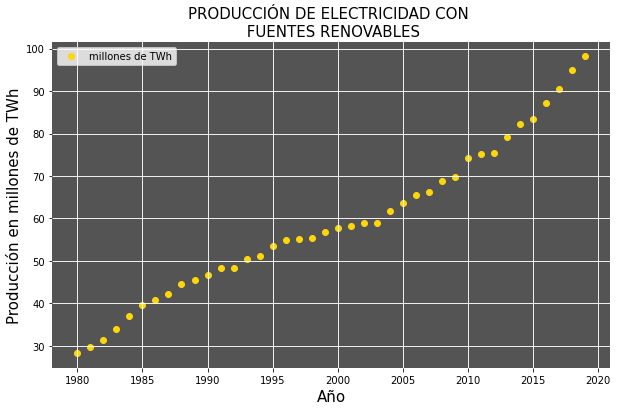

In [26]:
tema()
plt.scatter(x,y,color='#ffd60a')
plt.title('PRODUCCIÓN DE ELECTRICIDAD CON \n FUENTES RENOVABLES',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()

In [27]:
def regresionLineal(df):
    '''
    df = DataFrame
    '''
    model = LinearRegression(fit_intercept=True)
    X = np.array(df['Year'])
    y = np.array(df['Energy_production'])
    X = X[:, np.newaxis]
    model.fit(X, y)
    global X_train
    global X_test
    global y_train
    global y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
    lr = LinearRegression(fit_intercept = True)
    lr.fit(X_train, y_train)
    
    return lr

In [28]:
data_energia_renovable = regresionLineal(data_energia_renovable)

In [29]:
print(data_energia_renovable.coef_)

[1.53449305]


In [30]:
def grafica(modelo):
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    tema()
    plt.scatter(X_train, y_train,  color='green', linewidth=3.0, label = 'Datos Train')
    plt.plot(X_train, y_train_pred, color='k', linewidth=3.0, linestyle = '--', label = 'Prediccion Train')
    plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
    plt.plot(X_test, y_test_pred, color='blue', linewidth=3.0, label = 'Prediccion Test')
    plt.gcf().set_size_inches(10, 6)
    plt.legend()
    plt.show()

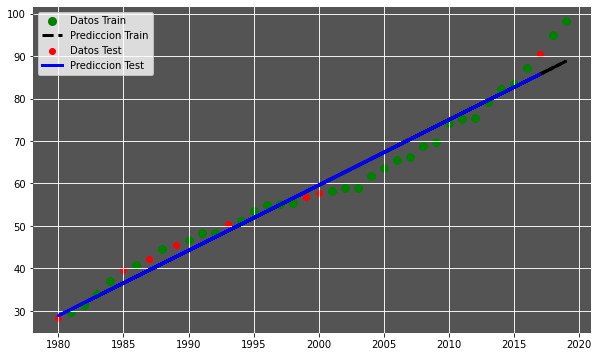

In [31]:
grafica(data_energia_renovable)

In [32]:
def prediccion(anio):
    '''
    fecha = 'AAAA'
    '''
    fn = anio # Fecha como número
    fn = np.array(fn)
    fn = fn.reshape(-1,1)
    prediccion = round(float(str(data_energia_renovable.predict(fn))[1:-1]),2)
    return prediccion

In [33]:
predicciones_10 = pd.DataFrame()
predicciones_10['Año'] = pd.DataFrame(range(2022,2033))

In [34]:
lista_años = list(predicciones_10['Año'])

In [35]:
predicciones_10['Energia_miles_kWh'] = predicciones_10['Año'].map(prediccion)

In [36]:
x_10 = predicciones_10['Año']
y_10 = predicciones_10['Energia_miles_kWh']

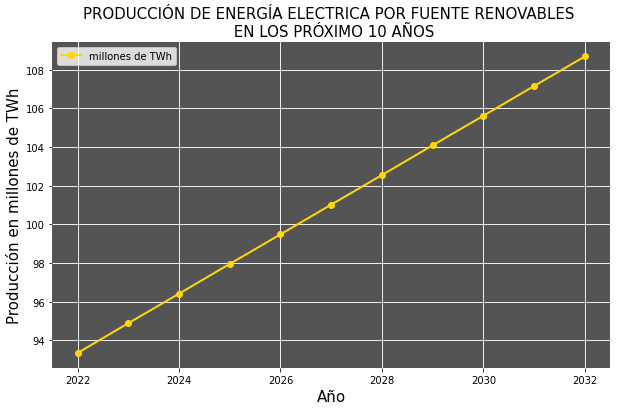

In [37]:
tema()

plt.plot(x_10,y_10,color='#ffd60a', linewidth = 2, marker="o")
plt.title('PRODUCCIÓN DE ENERGÍA ELECTRICA POR FUENTE RENOVABLES \n EN LOS PRÓXIMO 10 AÑOS',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()

In [38]:
predicciones_20 = pd.DataFrame()
predicciones_20['Año'] = pd.DataFrame(range(2022,2043))

In [39]:
lista_años = list(predicciones_20['Año'])

In [40]:
predicciones_20['Energia_miles_kWh'] = predicciones_20['Año'].map(prediccion)

In [41]:
x_20 = predicciones_20['Año']
y_20 = predicciones_20['Energia_miles_kWh']

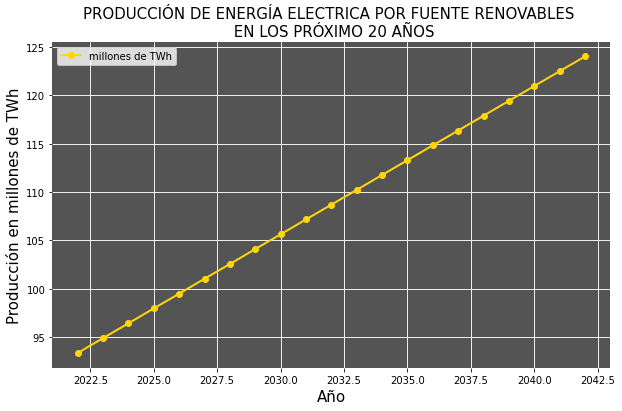

In [42]:
tema()

plt.plot(x_20,y_20,color='#ffd60a', linewidth = 2, marker="o")
plt.title('PRODUCCIÓN DE ENERGÍA ELECTRICA POR FUENTE RENOVABLES \n EN LOS PRÓXIMO 20 AÑOS',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()

In [43]:
predicciones_30 = pd.DataFrame()
predicciones_30['Año'] = pd.DataFrame(range(2022,2053))

In [44]:
lista_años = list(predicciones_30['Año'])

In [45]:
predicciones_30['Energia_miles_kWh'] = predicciones_30['Año'].map(prediccion)

In [46]:
x_30 = predicciones_30['Año']
y_30 = predicciones_30['Energia_miles_kWh']

In [48]:
y_30

0      93.34
1      94.88
2      96.41
3      97.95
4      99.48
5     101.02
6     102.55
7     104.09
8     105.62
9     107.16
10    108.69
11    110.22
12    111.76
13    113.29
14    114.83
15    116.36
16    117.90
17    119.43
18    120.97
19    122.50
20    124.03
21    125.57
22    127.10
23    128.64
24    130.17
25    131.71
26    133.24
27    134.78
28    136.31
29    137.85
30    139.38
Name: Energia_miles_kWh, dtype: float64

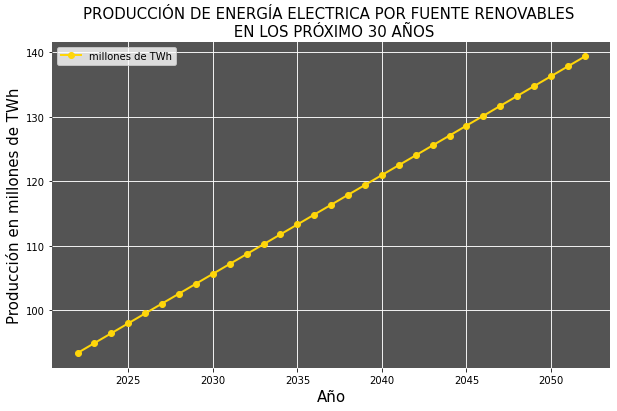

In [47]:
tema()

plt.plot(x_30,y_30,color='#ffd60a', linewidth = 2, marker="o")
plt.title('PRODUCCIÓN DE ENERGÍA ELECTRICA POR FUENTE RENOVABLES \n EN LOS PRÓXIMO 30 AÑOS',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()